# Task 1 Prediction using Supervised ML
# Aurthor: Manali Dharmendra Bhoir

OBJECTIVE: Predict the percentage of a student based on the no. of study hours. Also, What will be predicted score, if a student studies for 9.25 hrs/ day?

# Simple Linear Regression
In this regression task we will predict the percentage of marks that a student is expected to score based upon the number of hours they studied. This is a simple linear regression task as it involves just two variables.

Here, our dependent/Response variable(y) is percentage scores and independent/Predictor variable(x) is Hours Studied. 

# Libraries Required

In [1]:
library(caTools) 
library(ggplot2)
library(ggpubr)
library(repr)

# Importing the data

In [2]:
data = read.csv("student_scores - student_scores.csv")
head(data)
dim(data)
attach(data)

,Hours,Scores
,<dbl>,<int>
1,2.5,21
2,5.1,47
3,3.2,27
4,8.5,75
5,3.5,30
6,1.5,20


[1] 25  2

# Graphical Analysis

Scatter plot:Visualize the linear relationship between the predictor and response

Box plot: To spot any outlier observations in the variable.

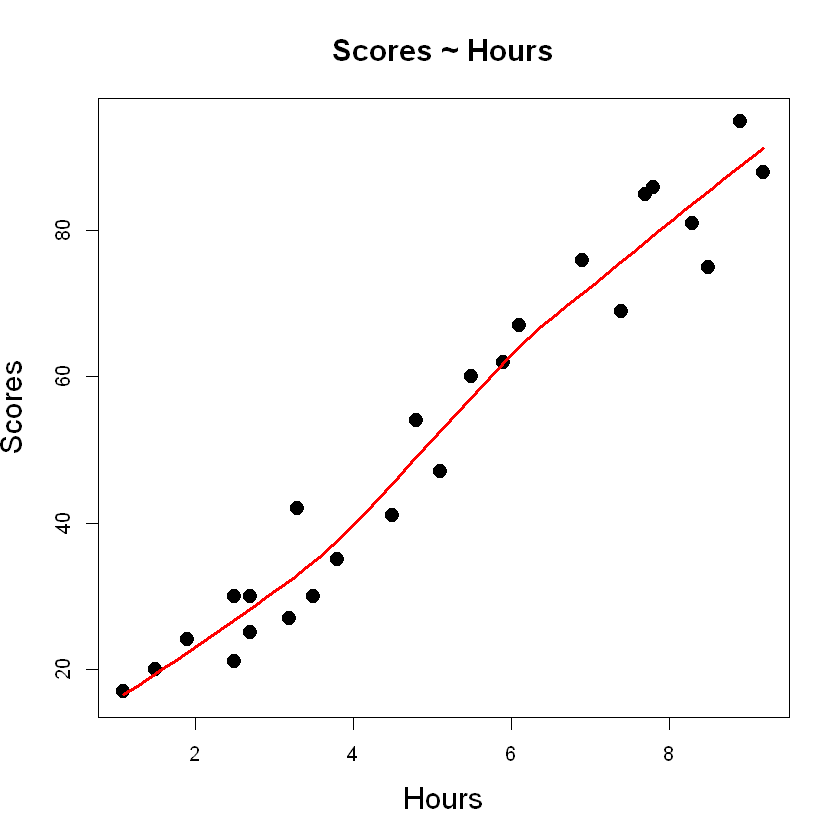

In [3]:
scatter.smooth(x=Hours, y=Scores, main="Scores ~ Hours",lpars =
                    list(col = "red", lwd = 3, lty = 1),pch=19,cex=1.5,cex.main=1.5,cex.lab=1.5)  # scatterplot

The scatter plot along with the smoothing line above suggests a linearly increasing relationship between the ‘Scores’ and ‘Hours’ variables.

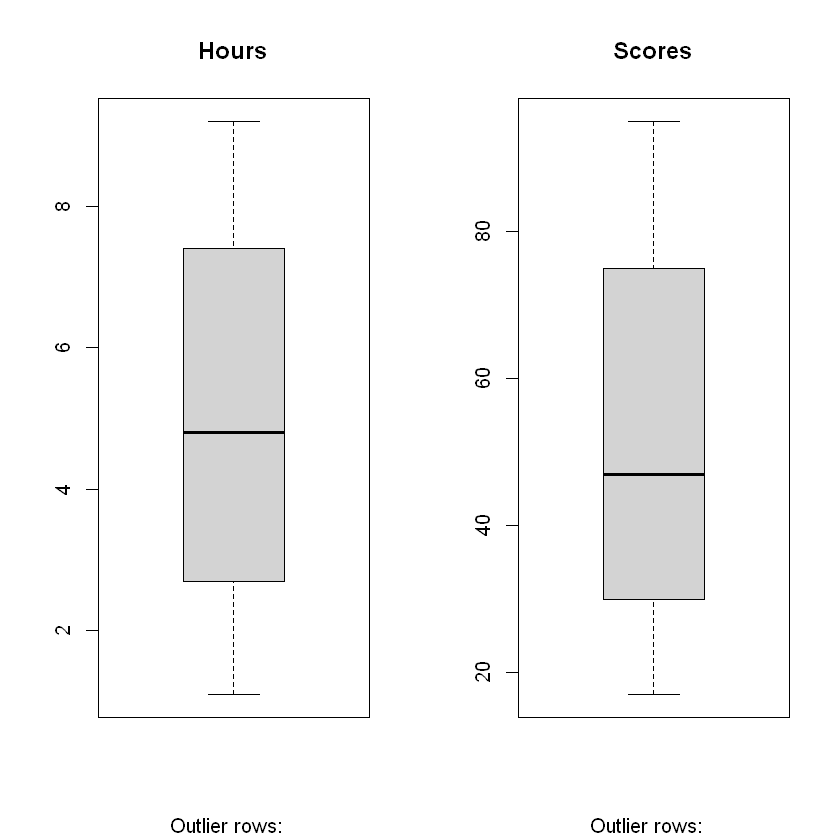

In [4]:
par(mfrow=c(1, 2))  # divide graph area in 2 columns
boxplot(Hours, main="Hours", sub=paste("Outlier rows: ", boxplot.stats(Hours)$out))  # box plot for 'Hours'
boxplot(Scores, main="Scores", sub=paste("Outlier rows: ", boxplot.stats(Scores)$out))  # box plot for 'Scores'

CORRELATION : To check linear dependence between two variables

In [5]:
cor(Hours,Scores)

[1] 0.9761907

Here, we see that there is high positive correlation between the variables.

# Build Linear Model on Full Data

In [16]:
linearMod = lm(Scores~Hours, data=data)  # build linear regression model on full data
summary(linearMod)


Call:
lm(formula = Scores ~ Hours, data = data)

Residuals:
    Min      1Q  Median      3Q     Max 
-10.578  -5.340   1.839   4.593   7.265 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   2.4837     2.5317   0.981    0.337    
Hours         9.7758     0.4529  21.583   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 5.603 on 23 degrees of freedom
Multiple R-squared:  0.9529,	Adjusted R-squared:  0.9509 
F-statistic: 465.8 on 1 and 23 DF,  p-value: < 2.2e-16


For the above output, you can notice the ‘Coefficients’ part having two components: Intercept: 2.4837, Hours:  9.7758.
These are also called the beta coefficients. In other words,
Scores = Intercept + (β ∗ Hours)
=> Scores = 2.4837 + 9.7758 ∗ Hours

# Predicting Linear Model

# 1. Spilting the data into Training and Testing set

In [7]:
set.seed(123) 
split = sample.split(Scores, SplitRatio = 3/4) 
training_set = subset(data, split == TRUE) 
test_set = subset(data, split == FALSE) 
dim(training_set);dim(test_set)

[1] 18  2

[1] 7 2

# 2. Develop the model on the training data and use it to predict the Scores on test data
i.e. Predicting the percentage of an student based on the no. of study hours

In [8]:
regressor = lm(formula = Scores~Hours, data = training_set) 

y_pred = predict(regressor, newdata = test_set)

df = data.frame(test_set,y_pred)

names(df) = c("Study Hours","Actual Scores","Predicted Scores");df

,Study Hours,Actual Scores,Predicted Scores
,<dbl>,<int>,<dbl>
5,3.5,30,36.59875
8,5.5,60,55.20002
11,7.7,85,75.66141
16,8.9,95,86.82217
20,7.4,69,72.87122
21,2.7,30,29.15824
24,6.9,76,68.22091


# 3. Review diagnostic measures

In [9]:
summary(regressor)


Call:
lm(formula = Scores ~ Hours, data = training_set)

Residuals:
    Min      1Q  Median      3Q     Max 
-8.1019 -4.4571  0.8804  2.9905  9.4085 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   4.0465     2.7108   1.493    0.155    
Hours         9.3006     0.5194  17.908 5.22e-12 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 5.457 on 16 degrees of freedom
Multiple R-squared:  0.9525,	Adjusted R-squared:  0.9495 
F-statistic: 320.7 on 1 and 16 DF,  p-value: 5.219e-12


From the model summary, the model p value and predictor’s p value are less than the significance level, so we know we have a statistically significant model. Also, the R-Sq and Adj R-Sq are comparative to the original model built on full data.

#  4: Calculate prediction accuracy and error rates

In [17]:
actuals_preds = data.frame(cbind(actual=test_set$Scores, predicted=y_pred))  # make actuals_predicteds dataframe.

corr=cor(df$`Actual Scores`,df$`Predicted Scores`)
cat("The Correlation Accuracy",corr)

min_max_accuracy = mean(apply(actuals_preds, 1, min) / apply(actuals_preds, 1, max));
cat("\nThe MinMaxAccuracy is ",min_max_accuracy) 

mape = mean(abs((actuals_preds$predicted - actuals_preds$actual))/actuals_preds$actual) 
cat("\nThe Mean Absolute Percentage Error (MAPE) is ",mape)


The Correlation Accuracy 0.9799053
The MinMaxAccuracy is  0.9086019
The Mean Absolute Percentage Error (MAPE) is  0.09748942

#  Visualizing the Training Set results and Testing Set Results

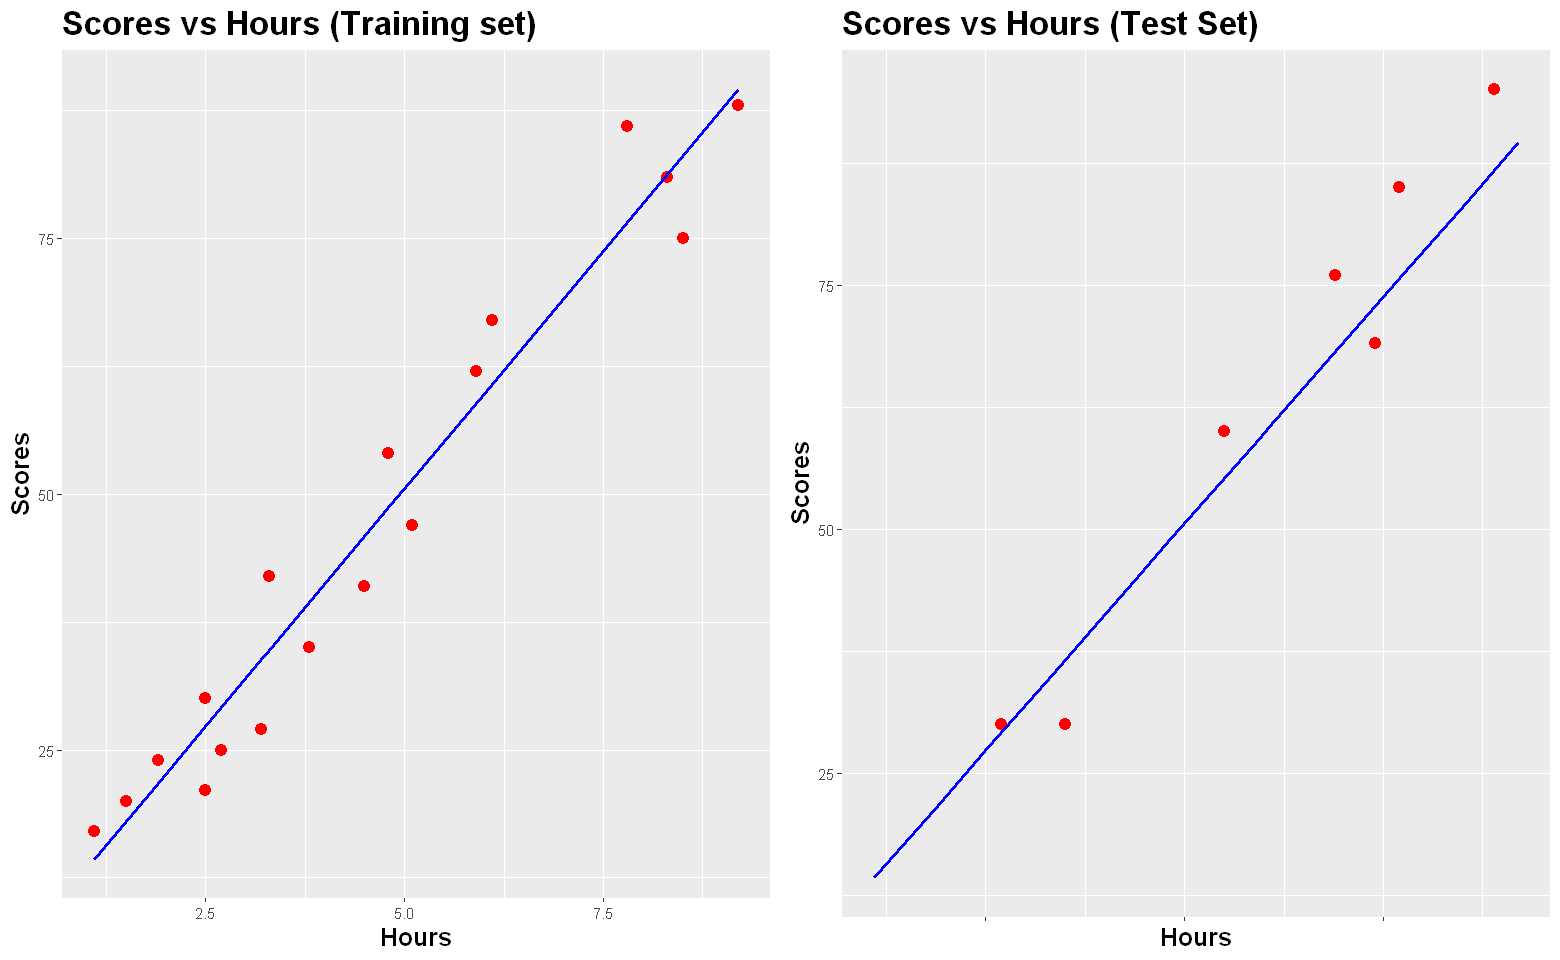

In [18]:
mytheme = theme(plot.title = element_text(face = "bold", size = 20),
                axis.title=element_text(face = "bold", size=15))

# Visualising the Training set results 
A = ggplot() + geom_point(aes(x = training_set$Hours,y = training_set$Scores),colour = 'red' , size = 3) + 
    geom_line(aes(x = training_set$Hours,y = predict(regressor, newdata = training_set)),colour = 'blue',size = 1) + 
    mytheme + ggtitle('Scores vs Hours (Training set)') + 
    xlab('Hours') + ylab('Scores') 

#Visualising the Testing set results 
B = ggplot() + geom_point(aes(x = test_set$Hours,y = test_set$Scores),colour = 'red',size=3) + 
    geom_line(aes(x = training_set$Hours,y = predict(regressor, newdata = training_set)),colour = 'blue',size=1) + 
    ggtitle('Scores vs Hours (Test Set)') + mytheme +
    xlab('Hours') + ylab('Scores')

options(repr.plot.width = 13, repr.plot.height = 8)

ggarrange(A, B + rremove("x.text"),labels = c(),ncol = 2, nrow = 1)

# What will be predicted score if a student studies for 9.25 hrs/ day?

In [20]:
new=data.frame(Hours=9.25)
pred=predict(regressor,new)

cat("If a student studies for 9.25hrs/day \n")
cat("Then the predicted score he/she will get is:",pred)

If a student studies for 9.25hrs/day 
Then the predicted score he/she will get is: 90.07739

# Thank You
- Manali Bhoir